# Quality vs (Test 1 and Test 2)
Here I predict if a chip complies with the standards based on two tests

In [1]:
#Load Modules
from pandas import read_csv
from numpy import ones, zeros, append, linspace, reshape, mean ,std, sum, array, dot
from pylab import plot, scatter, xlabel, ylabel, contour,figure, show, axes, title
from scipy.optimize import fmin_bfgs
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Read data from file
dataFrame = read_csv('data/data4.txt',names=['Test 1','Test 2','Quality'])
print dataFrame[:5]

     Test 1   Test 2  Quality
0  0.051267  0.69956        1
1 -0.092742  0.68494        1
2 -0.213710  0.69225        1
3 -0.375000  0.50219        1
4 -0.513250  0.46564        1


Since the data is not linear we need to add extra features (polynomial features)
Also in this example we will not normalize the data since all data is within [0,1]


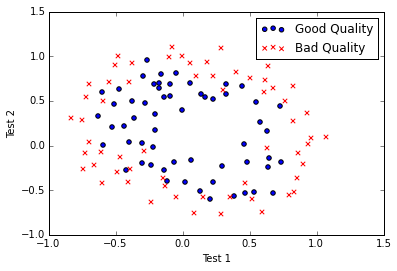

In [3]:
#Extract and plot data
data = dataFrame.as_matrix(columns = ['Test 1','Test 2','Quality'])
x = dataFrame.as_matrix(columns = ['Test 1','Test 2'])
y = dataFrame.as_matrix(columns = ['Quality'])

pos = where(y == 1)[0]
neg = where(y == 0)[0]

scatter(x[pos,0],x[pos,1],marker = 'o', c = 'b' )
scatter(x[neg,0],x[neg,1],marker = 'x', c = 'r' )
xlabel('Test 1')
ylabel('Test 2')
legend(['Good Quality','Bad Quality'])

print 'Since the data is not linear we need to add extra features (polynomial features)'
print 'Also in this example we will not normalize the data since all data is within [0,1]'

In [4]:
#functions to be used
#This function creates the polynomial features up to the polynomial degree polDeg
def createPolynomialFeatures(x,polDeg):
    x1 = x[:,0]
    x2 = x[:,1]
    x1.shape = (x1.size,1)
    x2.shape = (x2.size,1)
    X = ones((x1.size,1))
    for n in range(1,polDeg+1):
        for m in range(n+1):
            X = append(X,x1**(n-m)*x2**m,axis=1)
    return X

def sigmoid(z):
    return 1/(1+exp(-z))

def costFunction(theta,x,y, lamda=0):
    theta = reshape(theta,(theta.size,1))
    pred = sigmoid(dot(x,theta))
    J = mean(-y*log(pred)-(1-y)*log(1-pred))
    J = J + lamda*sum(square(theta[1:]))/(2*m)
    return J

def gradient(theta,x,y,lamda=0):
    theta = reshape(theta,(theta.size,1))
    pred = sigmoid(dot(x,theta))
    grad = dot(x.T,pred-y)/m
    grad[1:] = grad[1:] + lamda*theta[1:]/m
    return grad.flatten()

def prediction(theta,x,polDeg,mu=0,sigma=1):
    theta = reshape(theta,(theta.size,1))
    x.shape = (1,x.shape[0])
    x = (x-mu)/sigma
    X = createPolynomialFeatures(x, polDeg)
    pred = sigmoid(dot(X,theta))
    return pred

def accuracy(theta,x,y):
    theta = reshape(theta,(theta.size,1))
    pred = rint(sigmoid(dot(x,theta)))
    return sum(pred == y)/float(x.shape[0])*100

In [5]:
polDeg = 6
X = createPolynomialFeatures(x, polDeg)

m = X.shape[0]
n = X.shape[1]
#make initial theta as an array of 1D
inTheta = zeros(n)

For Lambda = 0.000000 we have the results:
The optimize values for Theta are: [   35.10191775    44.11916434    69.27187913  -344.2791121   -198.23463989
  -184.22842333  -295.82043601  -621.73265354  -510.8492478   -328.3117739
  1094.70045885  1269.58587657  1757.74916136   900.93793965   436.58882023
   471.12033584  1236.23841765  1822.81990327  1929.66716546  1131.05288152
   463.79914951 -1142.11743883 -2020.95895102 -3463.39952897 -3484.51016186
 -3252.2672306  -1546.00926671  -510.41259006] 
The Accuracy of the algorithm is: 91.525424


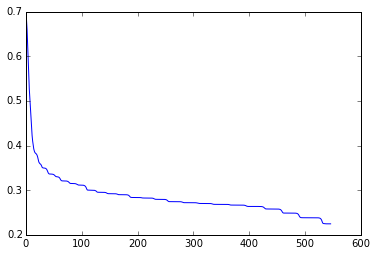

In [6]:
#run configuration
lamda = 0;#Parameter that tunes the degree of the fitting
#I set it to zero in order to overfit and observe
theta, theta_i = fmin_bfgs(costFunction,inTheta,fprime = gradient,args=(X,y,lamda),retall = 1, disp = 0)

J = zeros(len(theta_i))
for i,th in enumerate(theta_i):
    J[i] = costFunction(th,X,y,lamda)  
plot(J)

print 'For Lambda = %f we have the results:'%lamda
print 'The optimize values for Theta are: %s '%theta

acc = accuracy(theta,X,y)
print 'The Accuracy of the algorithm is: %f' %acc

We observe how the data is overfitted by the algorithm


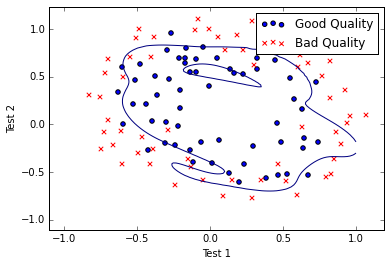

In [7]:
#Draw Boundary
x1 = linspace(-1,1,100)
x2 = linspace(-1,1,100)

Jv = empty((100,100))
for i, v1 in enumerate(x1):
    for j, v2 in enumerate(x2):
        v = array([v1,v2])
        Jv[i,j] = prediction(theta,v,polDeg)

contour(x1,x2,Jv,[0.5])
scatter(x[pos,0],x[pos,1],marker = 'o', c = 'b' )
scatter(x[neg,0],x[neg,1],marker = 'x', c = 'r' )
xlabel('Test 1')
ylabel('Test 2')
legend(['Good Quality','Bad Quality'])

print 'We observe how the data is overfitted by the algorithm'

# We look for optimal Lambda using training and cross validatiosn sets

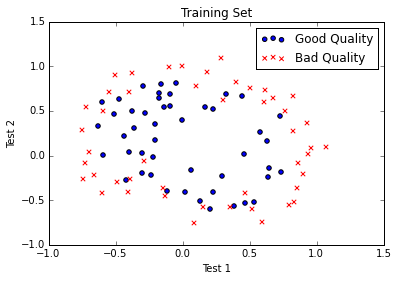

In [8]:
#Choose best Lambda check Cost function in training and cross validation set
# We separate our data into training and cross validation sets, 80% and 20% respectively
from numpy.random import shuffle
data = append(x,y,axis=1)
shuffle(data)
x = data[:,:2]
y = data[:,2]
y = reshape(y,(y.size,1))
xtrain = x[:rint(x.shape[0]*.8)]
ytrain = y[:rint(x.shape[0]*.8)]
xcv = x[rint(x.shape[0]*.8):]
ycv = y[rint(x.shape[0]*.8):]

#Plot the data in the training set
pos = where(ytrain == 1)[0]
neg = where(ytrain == 0)[0]
scatter(xtrain[pos,0],xtrain[pos,1],marker = 'o', c = 'b' )
scatter(xtrain[neg,0],xtrain[neg,1],marker = 'x', c = 'r' )
xlabel('Test 1')
ylabel('Test 2')
legend(['Good Quality','Bad Quality'])
title('Training Set')

polDeg = 6
Xtrain = createPolynomialFeatures(xtrain, polDeg)
Xcv = createPolynomialFeatures(xcv, polDeg)
#Normalize data and print it
#X,mu,sigma = normalizeData(X)
m = Xtrain.shape[0]
n = Xtrain.shape[1]
#make initial theta as an array of 1D
inTheta = zeros(n)

The optimize value for Lambda is in the minimum of the cross validation costFunction.
This values corresponds to Lambda = 0.081724
This point is shown in red


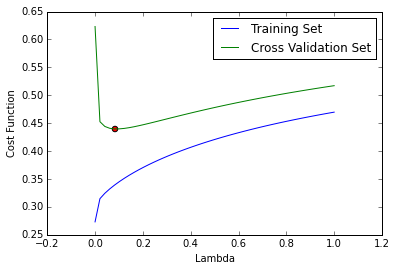

In [9]:
#Here we run the algorithm for many values of lambda
lamda = linspace(.0001,1,50)

Jtrain = empty(len(lamda))
Jcv = empty(len(lamda))
for i,lam in enumerate(lamda):
    theta = fmin_bfgs(costFunction,inTheta,fprime = gradient,args=(Xtrain,ytrain,lam), disp=0)
    Jtrain[i] = costFunction(theta,Xtrain,ytrain)
    Jcv[i] = costFunction(theta,Xcv,ycv)

#We plot the values for the costFunction and choose the optimize value for Lambda
plot(lamda,Jtrain,lamda,Jcv)
xlabel('Lambda')
ylabel('Cost Function')
legend(['Training Set','Cross Validation Set'])

ind = where(Jcv == amin(Jcv))
optLambda = lamda[ind]
scatter(optLambda, Jcv[ind], c='r', s = 30)

print 'The optimize value for Lambda is in the minimum of the cross validation costFunction.'
print 'This values corresponds to Lambda = %f'%lamda[ind]
print 'This point is shown in red'

With the optimized values of lambda we get a much smoother realistic boarder curve.


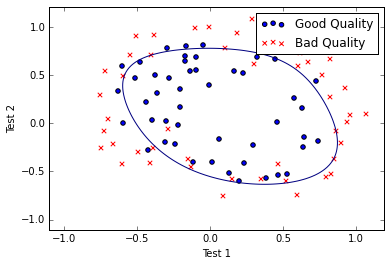

In [10]:
#We know compute out algorithm with the optimized value of lambda

X = createPolynomialFeatures(x, polDeg)

#X,mu,sigma = normalizeData(X)
m = X.shape[0]
n = X.shape[1]
#make initial theta as an array of 1D
inTheta = zeros(n)
#run configuration
optLambda = lamda[ind]
theta = fmin_bfgs(costFunction,inTheta,fprime = gradient,args=(X,y,optLambda), disp = 0)

#Draw Boundary
x1 = linspace(-1,1,100)
x2 = linspace(-1,1,100)

Jv = empty((100,100))
for i, v1 in enumerate(x1):
    for j, v2 in enumerate(x2):
        v = array([v1,v2])
        Jv[i,j] = prediction(theta,v,polDeg)

contour(x1,x2,Jv,[0.5])
scatter(x[pos,0],x[pos,1],marker = 'o', c = 'b' )
scatter(x[neg,0],x[neg,1],marker = 'x', c = 'r' )
xlabel('Test 1')
ylabel('Test 2')
legend(['Good Quality','Bad Quality'])

print 'With the optimized values of lambda we get a much smoother realistic boarder curve.'